# GDP by Country

Latest official GDP figures published by the World Bank. Population figures based on United Nations data.
World's GDP is $80,934,771,028,340 (nominal, 2017).

# Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Fetch Data

In [2]:
url = 'https://www.worldometers.info/gdp/gdp-by-country/'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html; charset=UTF-8 -- Encoding: UTF-8


# Parse HTML Document

In [3]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [4]:
tbody = soup.find('tbody')
trs = tbody.find_all('tr')

index = []
country = []
nominal_gdp = []
gdp_abbrev = []
gdp_growth = []
population = []


for td in trs:
    idx = index.append(td.find_all('td')[0].string)
    ctry = country.append(td.find_all('td')[1].find_all('a')[0].string)
    nom_gdp = nominal_gdp.append(td.find_all('td')[2].string) 
    abbrev_gdp = gdp_abbrev.append(td.find_all('td')[3].string)
    gdpg = gdp_growth.append(td.find_all('td')[4].string)
    pop = population.append(td.find_all('td')[5].string)

# Create DataFrame

In [5]:
data = {
    'Index': index,
    'Country': country,
    'Nominal_GDP_($)': nominal_gdp,
    'GDP_Abbrev_($)': gdp_abbrev,
    'GDP_Growth_(%)': gdp_growth,
    'Population': population
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df

,Index,Country,Nominal_GDP_($),GDP_Abbrev_($),GDP_Growth_(%),Population
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,"325,084,756"
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,"1,421,021,791"
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,"127,502,725"
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,"82,658,409"
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,"1,338,676,785"
...,...,...,...,...,...,...
185,186,Micronesia,"$336,427,500",$336 million,3.20%,"532,899"
186,187,Palau,"$289,823,500",$290 million,-3.57%,"17,808"
187,188,Marshall Islands,"$204,173,430",$204 million,3.60%,"58,058"
188,189,Kiribati,"$185,572,502",$186 million,0.33%,"114,158"


In [7]:
df.drop(columns=['Index', 'GDP_Abbrev_($)'], inplace=True)                                 # drop index and abbreviated gdp columns

In [8]:
df

,Country,Nominal_GDP_($),GDP_Growth_(%),Population
0,United States,"$19,485,394,000,000",2.27%,"325,084,756"
1,China,"$12,237,700,479,375",6.90%,"1,421,021,791"
2,Japan,"$4,872,415,104,315",1.71%,"127,502,725"
3,Germany,"$3,693,204,332,230",2.22%,"82,658,409"
4,India,"$2,650,725,335,364",6.68%,"1,338,676,785"
...,...,...,...,...
185,Micronesia,"$336,427,500",3.20%,"532,899"
186,Palau,"$289,823,500",-3.57%,"17,808"
187,Marshall Islands,"$204,173,430",3.60%,"58,058"
188,Kiribati,"$185,572,502",0.33%,"114,158"


# Data Cleaning

In [9]:
df['Nominal_GDP_($)'] = df['Nominal_GDP_($)'].str.lstrip('$').str.replace(',', '')     # strip dollar signs and commas from Nominal GDP

In [10]:
df.head()

,Country,Nominal_GDP_($),GDP_Growth_(%),Population
0,United States,19485394000000,2.27%,"325,084,756"
1,China,12237700479375,6.90%,"1,421,021,791"
2,Japan,4872415104315,1.71%,"127,502,725"
3,Germany,3693204332230,2.22%,"82,658,409"
4,India,2650725335364,6.68%,"1,338,676,785"


In [11]:
df['GDP_Growth_(%)'] = df['GDP_Growth_(%)'].str.rstrip('%')                             # right strip percentage signs

In [12]:
df.head()

,Country,Nominal_GDP_($),GDP_Growth_(%),Population
0,United States,19485394000000,2.27,"325,084,756"
1,China,12237700479375,6.90,"1,421,021,791"
2,Japan,4872415104315,1.71,"127,502,725"
3,Germany,3693204332230,2.22,"82,658,409"
4,India,2650725335364,6.68,"1,338,676,785"


In [13]:
df['Population'] = df['Population'].str.replace(',', '')                                 # remove commas from population
df.head()

,Country,Nominal_GDP_($),GDP_Growth_(%),Population
0,United States,19485394000000,2.27,325084756
1,China,12237700479375,6.90,1421021791
2,Japan,4872415104315,1.71,127502725
3,Germany,3693204332230,2.22,82658409
4,India,2650725335364,6.68,1338676785


In [14]:
df['GDP_Growth_(%)'] = df['GDP_Growth_(%)'].astype(np.float64)                            # change gdp growth to float
df['GDP_Growth_(%)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 190 entries, 0 to 189
Series name: GDP_Growth_(%)
Non-Null Count  Dtype  
--------------  -----  
190 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [15]:
df[['Nominal_GDP_($)', 'Population']] = df[['Nominal_GDP_($)', 'Population']].applymap(lambda x: np.int64(x))  # change data type to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          190 non-null    object 
 1   Nominal_GDP_($)  190 non-null    int64  
 2   GDP_Growth_(%)   190 non-null    float64
 3   Population       190 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.1+ KB


# Data Exploration

In [16]:
df.shape                                                                                        # return the dimensions of the dataframe

(190, 4)

In [17]:
df['Country'].nunique()                                                                          # count unique countries

190

In [18]:
df[['Nominal_GDP_($)', 'Population']].describe()                                                 # generate descriptive statistics

,Nominal_GDP_($),Population
count,1.900000e+02,1.900000e+02
mean,4.188098e+11,3.902765e+07
std,1.755006e+12,1.461575e+08
min,3.973132e+07,1.137000e+04
25%,8.121906e+09,1.858883e+06
50%,3.639298e+10,7.971161e+06
75%,2.117603e+11,2.778428e+07
max,1.948539e+13,1.421022e+09


<AxesSubplot:xlabel='Nominal_GDP_($)', ylabel='Density'>

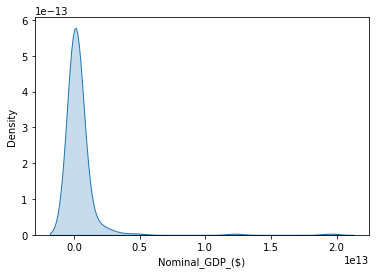

In [19]:
sns.kdeplot(data=df, x='Nominal_GDP_($)', shade=True)

<AxesSubplot:xlabel='Population', ylabel='Density'>

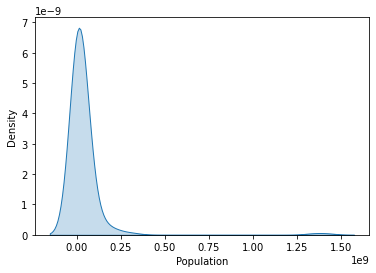

In [20]:
sns.kdeplot(data=df, x='Population', shade=True)